# Jamie's Fun Lil' Data Science Diary

### Questions:

* What is an indicator of pneumonia and why?
    * Viral pneumonia on the X-ray is characterized by such a pattern as Ground-glass opacity. Bacterial pneumonia has clear areas of opacity. In our dataset, we have a lot of people with pneumonia.
    * What's the difference between viral and bacterial and why do they look different on the scans?
    * How are we gonna deal with class imbalance?
    * How do we distinguish between viral and bacterial images (python-wise)?
    
* Are computers already being used to do this work for doctors?

* Facts/figures
    * Pneumonia is the world's leading killer of children under 5
    
* How can we verify the safety of using these models as opposed to experts? Have there been instances where the model was right and the expert was wrong?

In [56]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from scipy.ndimage import zoom
import pandas as pd

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.wrappers import scikit_learn
from tensorflow.keras.callbacks import EarlyStopping

In [6]:
import os

In [7]:
# Source Code: https://www.kaggle.com/dmitriyveselov/first-simple-keras-cnn-88-90-accuracy-chest-xray

base_dir='../data/chest_xray/'
train_pneumonia=os.listdir('../data/chest_xray/train/PNEUMONIA/')
train_normal=os.listdir('../data/chest_xray/train/NORMAL/')
val_dir_normal=os.listdir('../data/chest_xray/val/NORMAL/')
test_dir_normal=os.listdir('../data/chest_xray/test/NORMAL/')
val_dir_pneumonia=os.listdir('../data/chest_xray/val/PNEUMONIA/')
test_dir_pneumonia=os.listdir('../data/chest_xray/test/PNEUMONIA/')

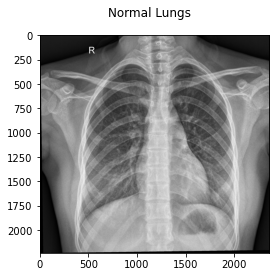

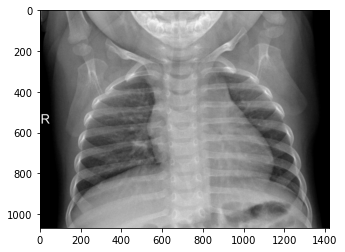

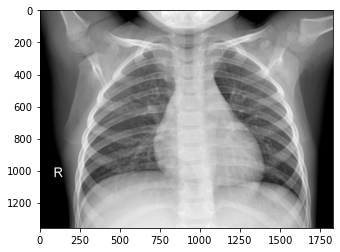

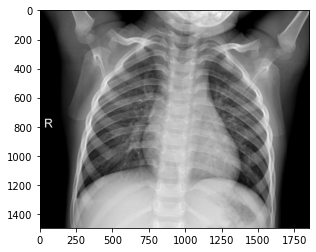

In [8]:
from keras.preprocessing.image import ImageDataGenerator, load_img
plt.suptitle('Normal Lungs')
for i in range(0,4):
    img = train_normal[i]
    img = load_img('../data/chest_xray/train/NORMAL/' + img)
    plt.imshow(img)
    plt.show()

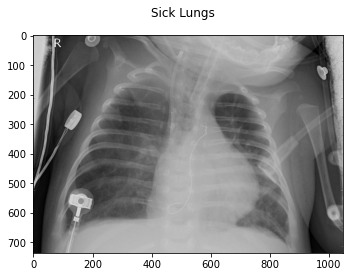

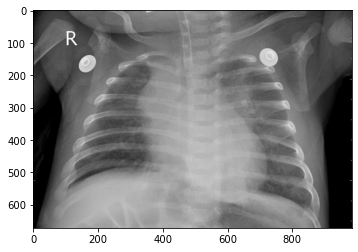

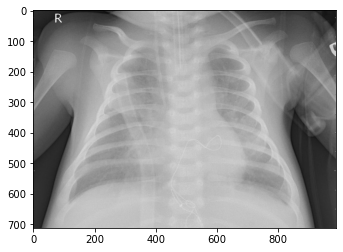

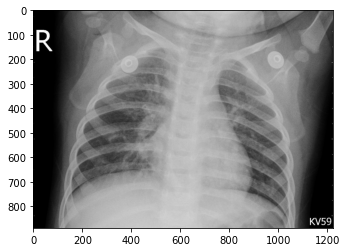

In [9]:
plt.suptitle('Sick Lungs')
for i in range(0,4):
    img = train_pneumonia[i]
    img = load_img('../data/chest_xray/train/PNEUMONIA/' + img)
    plt.imshow(img)
    plt.show()

<AxesSubplot:>

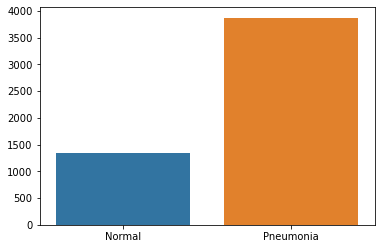

In [17]:
sns.barplot(x=['Normal','Pneumonia'],y=[len(train_normal),len(train_pneumonia)])

In [11]:
pneumonia_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.4,
                                   zoom_range=0.4
                                 )

In [12]:
normal_img_arrays = []

for i in range(len(train_normal)):
    img = train_normal[i]
    img = load_img('../data/chest_xray/train/NORMAL/' + img)
    array = np.array(img)[:,:,0]
    normal_img_arrays.append(array)

In [13]:
pneumonia_img_arrays = []

for i in range(len(train_pneumonia)):
    img = train_pneumonia[i]
    img = load_img('../data/chest_xray/train/PNEUMONIA/' + img)
    array = np.array(img)[:,:,0]
    pneumonia_img_arrays.append(array)

In [14]:
len(normal_img_arrays) == len(train_normal)

True

In [116]:
len(pneumonia_img_arrays) == len(train_pneumonia)

True

In [117]:
gs_sums = []

for array in normal_img_arrays:
    gs_sums.append(array.sum())
    

In [118]:
gs_sums_p = []

for array in pneumonia_img_arrays:
    gs_sums_p.append(array.sum())

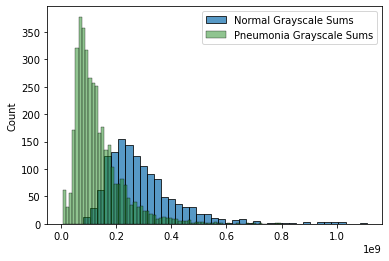

In [119]:
sns.histplot(x=gs_sums, label='Normal Grayscale Sums')
sns.histplot(x=gs_sums_p, color='forestgreen', alpha=0.5, label='Pneumonia Grayscale Sums')
plt.legend()

In [110]:
pneumonia_img_arrays[3][:,:,0].sum()

132158485

In [111]:
pneumonia_img_arrays[3][:,:,1].sum()

132158485

In [112]:
pneumonia_img_arrays[3][:,:,2].sum()

132158485

In [118]:
normal_img_sliced = []

for i in range(len(train_normal)):
    img = train_normal[i]
    img = load_img('../data/chest_xray/train/NORMAL/' + img)
    array = np.array(img)[400:2000, 400:2000,0]
    normal_img_arrays.append(array)

In [ ]:
pneumonia_img_sliced = []

for i in range(len(train_pneumonia)):
    img = train_pneumonia[i]
    img = load_img('../data/chest_xray/train/PNEUMONIA/' + img)
    array = np.array(img)[400:2000, 400:2000,0]
    pneumonia_img_arrays.append(array)

In [39]:
gs_sums = []

for array in normal_img_arrays:
    gs_sums.append(array.sum())

In [40]:
gs_sums_p = []

for array in pneumonia_img_arrays:
    gs_sums_p.append(array.sum())

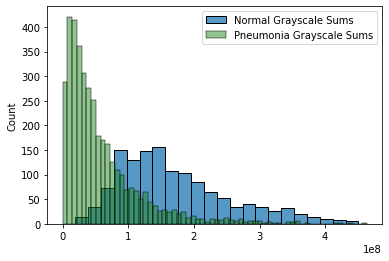

In [41]:
# Sliced histplot
sns.histplot(x=gs_sums, label='Normal Grayscale Sums')
sns.histplot(x=gs_sums_p, color='forestgreen', alpha=0.5, label='Pneumonia Grayscale Sums')
plt.legend()

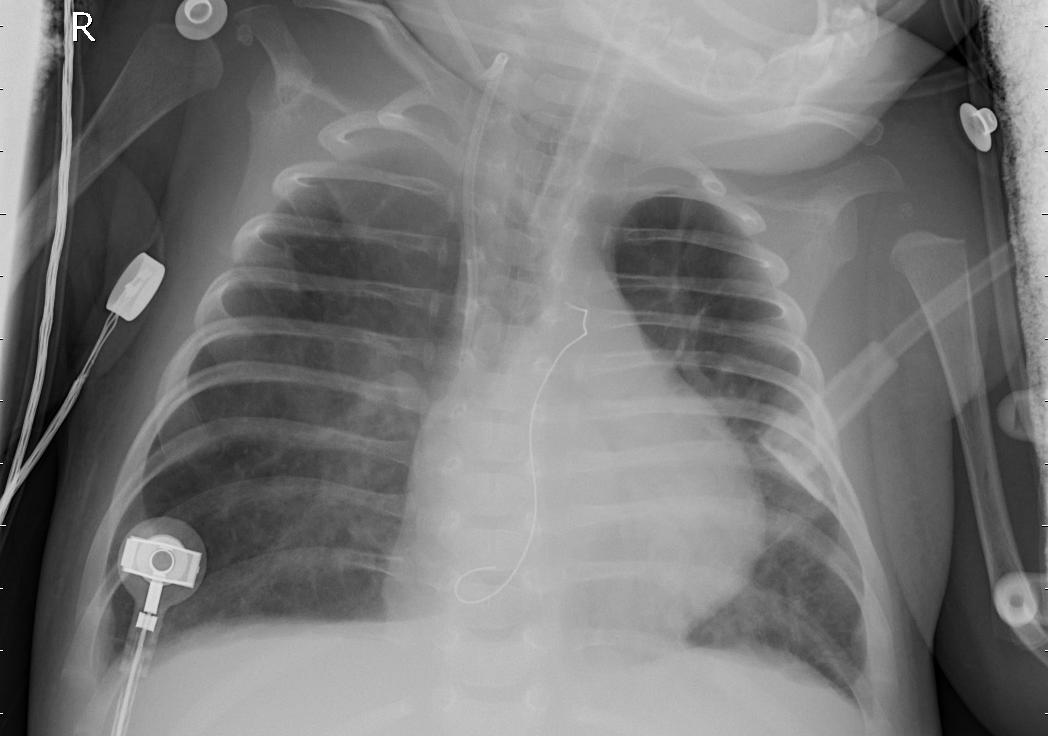

In [10]:
# first sick patient image
img = train_pneumonia[0]
img = load_img('../data/chest_xray/train/PNEUMONIA/' + img)
img

In [17]:
from PIL import Image as im

In [24]:
zoomed_normal = zoom(normal_img_arrays[0], zoom=0.2)

In [27]:
normal_img_arrays[0].shape

(2234, 2359)

In [34]:
sliced = normal_img_arrays[0][400:2000, 400:2000]

In [35]:
zoomed_img = im.fromarray(sliced)

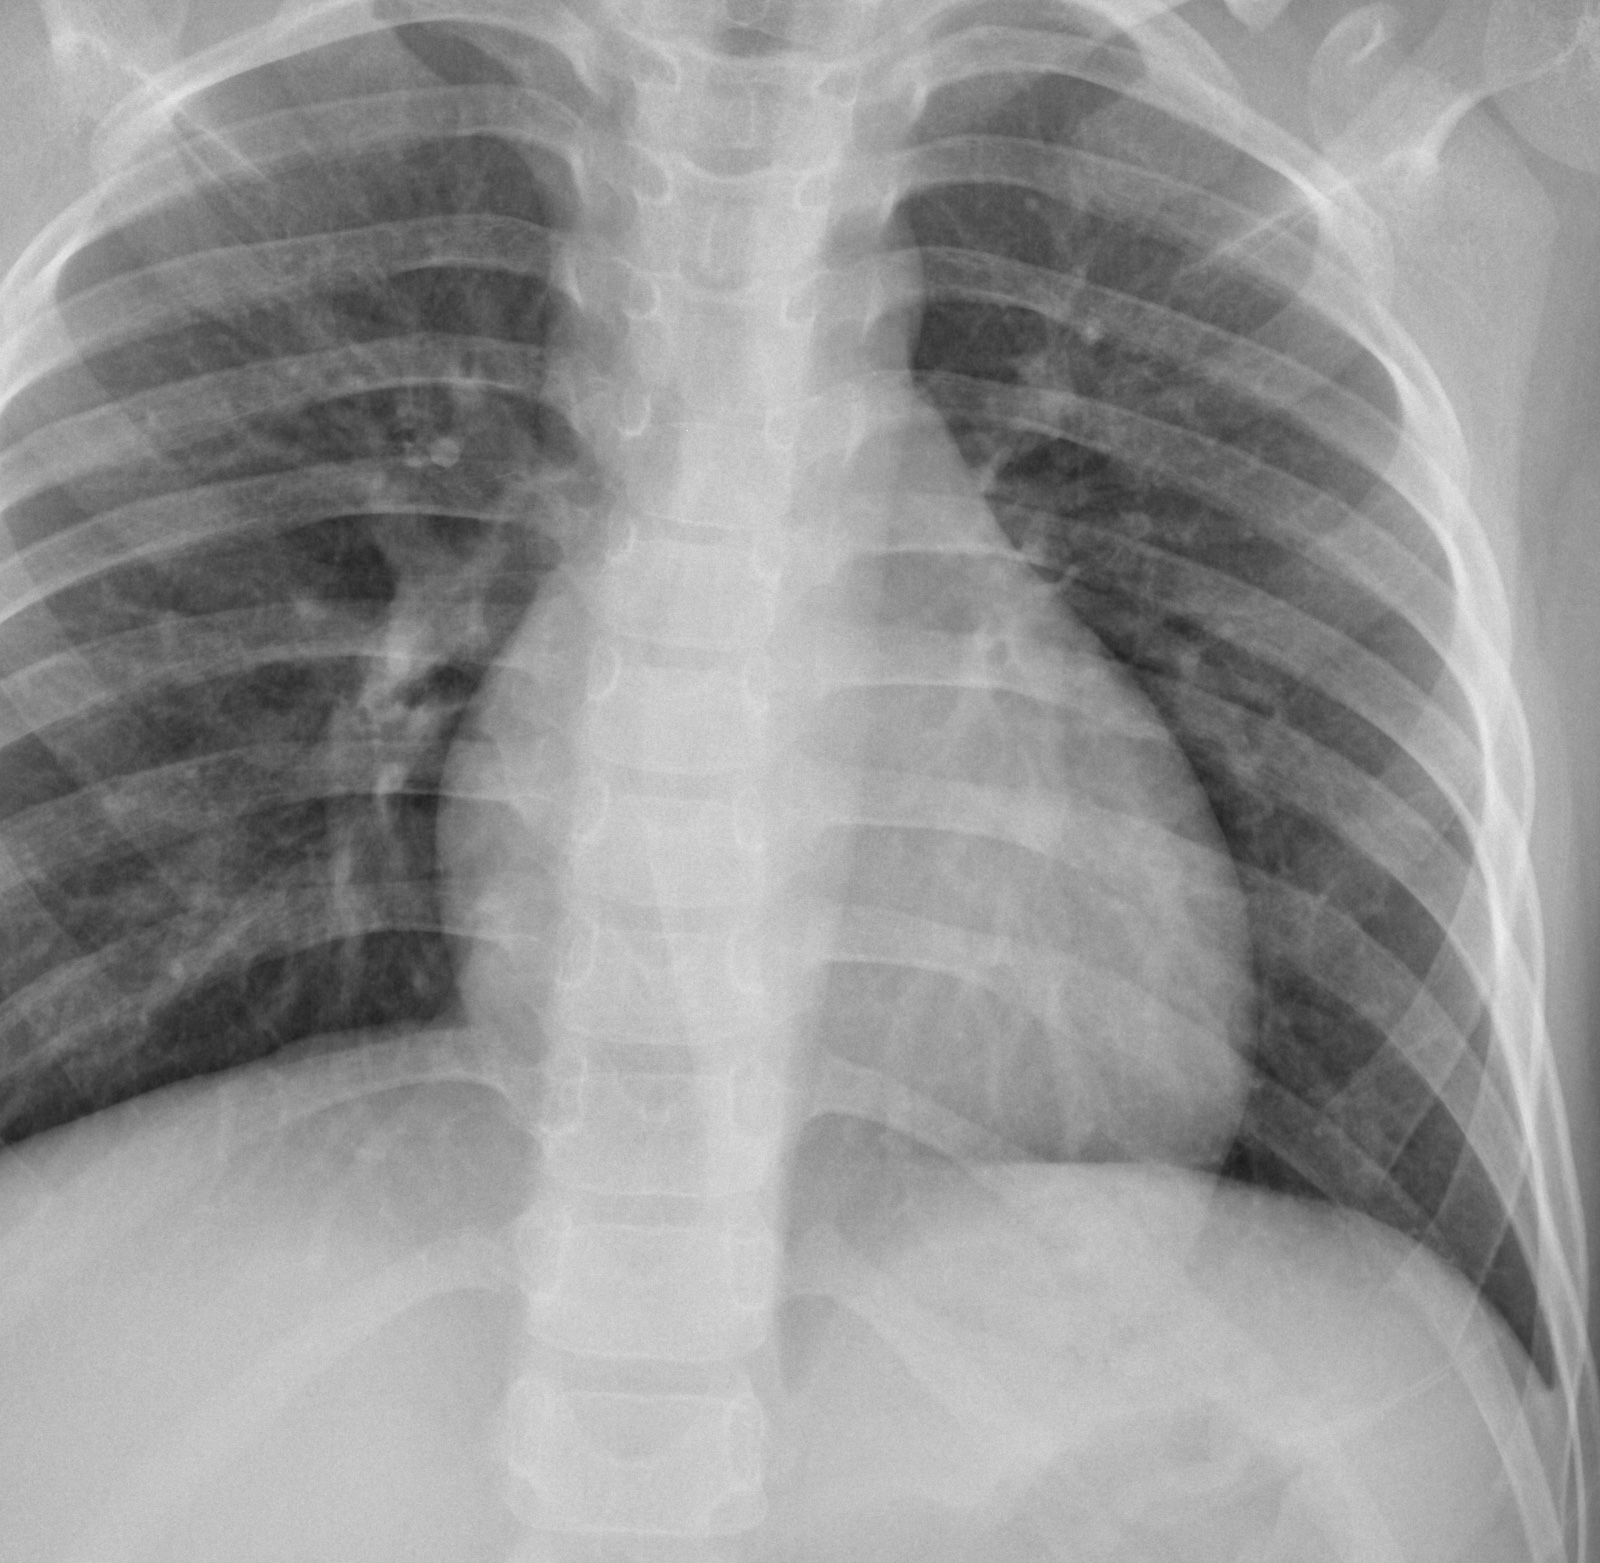

In [43]:
img2 = im.fromarray(normal_img_arrays[5])
img2

#### Preprocessing

In [45]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   horizontal_flip=True,
                                   vertical_flip=True, # may change to false....don't think this would be useful??
                                   rotation_range=0.4,
                                   zoom_range=0.4
                                 )

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('../data/chest_xray/train/',
                                                 target_size=(224, 224),
                                                 batch_size=50,
                                                 class_mode='binary')

val_set = train_datagen.flow_from_directory('../data/chest_xray/val/',
                                            target_size=(224, 224),
                                            shuffle=True,
                                            batch_size=50,
                                            class_mode='binary')

test_set = test_datagen.flow_from_directory('../data/chest_xray/test/',
                                            target_size=(224, 224),
                                            batch_size=50,
                                            class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


#### FSM 

In [ ]:
model = Sequential()

In [43]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['categorical_accuracy'])


In [37]:
from keras.layers import Dense, Dropout, Flatten

In [45]:
model.add(Flatten())

In [51]:
def slice_preprocessed_array():
    '''
    Takes in the set of image matrices and slices them to only contain the actual lung (area of import).
    '''
    return None

In [47]:
len(training_set[0])

2

In [49]:
len(training_set[0][0])

50

In [48]:
len(training_set)

105

In [46]:
training_set[0][0][0].shape

(224, 224, 3)

In [54]:
training_set[1][0][0].shape

(224, 224, 3)

In [55]:
training_set[1][1][0].shape

()

In [53]:
test_set[0][0].shape

(50, 224, 224, 3)

In [47]:
# fitting
history = model.fit_generator(training_set,
                    epochs=10,
                    validation_data=test_set)

Epoch 1/10
105/105 [==============================] - 182s 2s/step - loss: 1.2972 - categorical_accuracy: 0.0037 - val_loss: 1.2483 - val_categorical_accuracy: 0.0000e+00
Epoch 2/10
105/105 [==============================] - 178s 2s/step - loss: 1.2799 - categorical_accuracy: 0.0022 - val_loss: 1.2483 - val_categorical_accuracy: 0.0000e+00
Epoch 3/10
105/105 [==============================] - 193s 2s/step - loss: 1.3062 - categorical_accuracy: 9.3743e-04 - val_loss: 1.2483 - val_categorical_accuracy: 0.0000e+00
Epoch 4/10
105/105 [==============================] - 190s 2s/step - loss: 1.2947 - categorical_accuracy: 0.0014 - val_loss: 1.2483 - val_categorical_accuracy: 0.0000e+00
Epoch 5/10
105/105 [==============================] - 175s 2s/step - loss: 1.2670 - categorical_accuracy: 0.0026 - val_loss: 1.2483 - val_categorical_accuracy: 0.0000e+00
Epoch 6/10
105/105 [==============================] - 176s 2s/step - loss: 1.2883 - categorical_accuracy: 0.0022 - val_loss: 1.2483 - val_cat

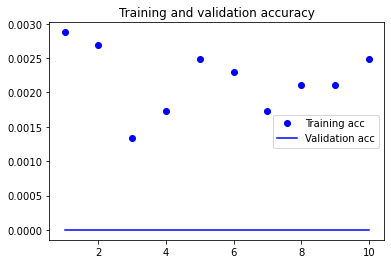

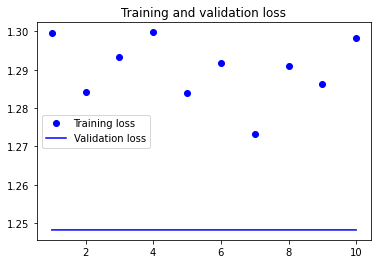

In [49]:

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss'
        )
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

In [74]:
norms = pd.DataFrame(normal_img_arrays)

/Users/jamiedowat/PySpace/anaconda3/lib/python3.8/site-packages/pandas/core/internals/construction.py:309: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  values = np.array([convert(v) for v in values])


In [75]:
norms['target'] = 0

In [76]:
sick = pd.DataFrame(pneumonia_img_arrays)

In [77]:
sick['target'] = 1

In [78]:
df = pd.concat([norms, sick])

In [79]:
len(df) == (len(normal_img_arrays)+len(pneumonia_img_arrays))

True

In [80]:
df.head()

,0,target
0,"[[178, 152, 153, 161, 164, 167, 153, 156, 170,...",0
1,"[[131, 133, 134, 136, 134, 127, 124, 130, 130,...",0
2,"[[163, 164, 165, 168, 168, 171, 177, 177, 178,...",0
3,"[[129, 139, 143, 141, 137, 136, 137, 135, 139,...",0
4,"[[193, 189, 185, 189, 186, 197, 186, 188, 191,...",0


In [81]:
df.target.value_counts()

1    3875
0    1341
Name: target, dtype: int64

In [112]:
df[0].iloc[10].shape

(752, 1042)

In [100]:
X_pre = np.array(df[0])
y = np.array(df['target'])

In [105]:
X = []

for data in X_pre:
    X.append(data)

In [106]:
X[0].shape

(1600, 1600)

In [114]:
normal_img_arrays[10].shape

(752, 1042)

In [107]:
# Using X and y
model = Sequential()

In [108]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X, y, epochs=10, batch_size=50, shuffle=True)

ValueError: Data cardinality is ambiguous:
  x sizes: 1600, 667, 957, 1095, 1566, 1563, 1265, 686, 485, 784, 752, 706, 1600, 649, 902, 1215, 953, 964, 709, 836, 1600, 1600, 991, 415, 903, 578, 613, 1010, 1247, 1127, 1386, 1559, 636, 555, 725, 1277, 1034, 1512, 821, 764, 1415, 620, 1600, 1002, 953, 1404, 1361, 1099, 941, 775, 721, 1119, 682, 1339, 1304, 1103, 828, 933, 794, 605, 910, 752, 1165, 775, 810, 1234, 1192, 392, 814, 1111, 953, 933, 1096, 1272, 845, 987, 825, 744, 809, 709, 1254, 613, 664, 1600, 930, 1093, 1080, 620, 1436, 1238, 581, 1404, 1037, 1600, 1022, 1335, 771, 1600, 802, 1536, 906, 1600, 783, 1046, 1354, 705, 937, 899, 1269, 1520, 1072, 1206, 1025, 608, 1076, 1003, 953, 816, 868, 1145, 849, 845, 705, 775, 706, 995, 748, 934, 1142, 856, 1132, 1127, 1600, 644, 864, 1600, 1377, 1181, 1080, 890, 624, 1273, 508, 1087, 806, 1600, 1319, 1068, 1076, 1084, 670, 1381, 1173, 594, 659, 872, 894, 848, 887, 1204, 968, 1107, 690, 550, 1223, 895, 1037, 1080, 713, 767, 1188, 1176, 1010, 1455, 728, 675, 1254, 493, 1323, 1248, 1600, 1397, 1095, 825, 895, 879, 433, 999, 805, 1042, 1567, 871, 659, 983, 1057, 667, 1211, 682, 767, 902, 895, 690, 928, 999, 1068, 768, 941, 910, 594, 1254, 798, 736, 729, 1600, 983, 632, 937, 896, 574, 848, 431, 1466, 1041, 876, 670, 721, 1296, 617, 1115, 809, 644, 1038, 751, 751, 1088, 829, 578, 559, 1049, 941, 620, 1266, 648, 1373, 852, 648, 1277, 1559, 741, 697, 1122, 593, 941, 1238, 844, 1107, 960, 957, 1427, 1250, 1358, 752, 736, 929, 914, 416, 624, 1022, 647, 1200, 800, 1030, 1137, 952, 1080, 910, 1600, 1033, 1300, 694, 906, 485, 656, 1555, 1018, 1385, 941, 806, 1343, 636, 651, 933, 904, 747, 725, 980, 1242, 918, 674, 1293, 895, 879, 771, 791, 856, 1254, 674, 1509, 1230, 1412, 568, 775, 1134, 1600, 1138, 1173, 1022, 1227, 531, 940, 1412, 778, 991, 787, 952, 872, 980, 767, 891, 1049, 1284, 1254, 400, 775, 914, 586, 879, 1030, 570, 690, 620, 560, 779, 737, 1439, 369, 921, 953, 1335, 828, 1212, 1056, 902, 956, 536, 1153, 989, 678, 899, 880, 1153, 817, 1570, 956, 801, 864, 980, 1014, 805, 918, 1041, 767, 887, 1103, 1350, 1157, 628, 1080, 347, 1600, 1600, 1242, 1292, 937, 983, 1393, 617, 1122, 879, 1118, 1060, 1600, 927, 1520, 1002, 1270, 756, 752, 1212, 1192, 948, 1052, 1600, 1528, 1176, 1227, 442, 1600, 740, 1072, 930, 1021, 1600, 1115, 829, 1076, 1195, 1590, 822, 980, 840, 1366, 806, 1028, 1142, 524, 1011, 817, 879, 570, 1106, 1165, 872, 736, 771, 651, 979, 1042, 678, 805, 717, 551, 910, 709, 787, 1458, 918, 1030, 857, 837, 786, 1022, 856, 910, 1600, 1215, 826, 1346, 980, 879, 659, 1385, 609, 1103, 968, 1600, 925, 500, 944, 1215, 1465, 904, 1265, 1347, 941, 1308, 779, 1107, 1481, 894, 944, 794, 1061, 1361, 922, 906, 1524, 1130, 1172, 953, 666, 1111, 648, 860, 883, 872, 674, 859, 844, 736, 879, 624, 880, 1057, 728, 798, 728, 540, 1080, 797, 1099, 1401, 771, 756, 682, 953, 1042, 1270, 1100, 1037, 674, 1073, 1010, 1500, 1219, 1404, 1152, 1405, 1022, 1364, 795, 751, 636, 756, 871, 594, 787, 1104, 867, 1100, 968, 1219, 566, 706, 593, 662, 1600, 821, 667, 1315, 760, 404, 736, 949, 1065, 578, 1211, 408, 1061, 821, 1269, 972, 922, 1231, 1532, 1204, 1508, 424, 1007, 744, 559, 1600, 1088, 1600, 1096, 1011, 1046, 806, 771, 952, 725, 867, 1022, 1308, 865, 1273, 999, 578, 648, 1146, 821, 829, 767, 690, 1600, 728, 760, 1134, 836, 758, 941, 1169, 686, 902, 1268, 1578, 1114, 875, 613, 670, 1478, 1288, 1000, 771, 578, 1068, 1053, 593, 737, 856, 925, 1157, 651, 567, 1211, 714, 729, 1119, 1600, 999, 798, 1158, 612, 774, 1080, 1600, 1536, 706, 1204, 1123, 1254, 930, 678, 872, 794, 632, 992, 1238, 825, 1204, 1385, 790, 272, 1439, 1600, 1600, 504, 999, 968, 945, 941, 872, 1127, 1219, 1470, 837, 709, 1037, 690, 856, 912, 764, 779, 891, 825, 756, 1212, 975, 1600, 1563, 810, 667, 732, 782, 1015, 446, 1006, 400, 1600, 980, 1469, 894, 887, 1195, 887, 555, 674, 1514, 783, 879, 1038, 1181, 651, 821, 1099, 1478, 914, 763, 1262, 1223, 860, 748, 1420, 570, 640, 1516, 659, 1072, 1288, 1203, 1305, 675, 1026, 674, 817, 1351, 883, 783, 1182, 983, 809, 706, 1022, 1350, 991, 1600, 1551, 628, 845, 1007, 1204, 1262, 697, 806, 810, 1142, 1266, 721, 551, 752, 1014, 709, 1600, 910, 1110, 612, 1377, 833, 1466, 1087, 856, 868, 822, 744, 867, 891, 644, 1312, 592, 643, 929, 872, 1154, 1547, 1369, 1207, 485, 810, 1505, 1076, 1404, 906, 393, 559, 1300, 1600, 450, 736, 462, 779, 690, 1377, 1281, 841, 709, 652, 701, 771, 1069, 1600, 855, 755, 775, 1141, 937, 948, 829, 613, 1329, 953, 999, 1203, 1401, 1227, 724, 1188, 1003, 902, 1200, 839, 1343, 605, 1261, 1454, 821, 1600, 818, 609, 913, 1454, 728, 871, 1482, 1095, 464, 825, 504, 814, 1393, 1570, 1600, 671, 794, 860, 1508, 883, 566, 617, 1355, 886, 697, 721, 778, 1600, 937, 578, 922, 1600, 1600, 1095, 1219, 1096, 860, 1280, 551, 779, 1061, 724, 771, 1370, 1045, 679, 550, 1080, 680, 875, 953, 1188, 721, 790, 1600, 760, 1018, 995, 744, 1513, 701, 683, 808, 949, 945, 1416, 1018, 574, 432, 532, 898, 601, 1177, 1042, 733, 1161, 928, 779, 721, 1026, 729, 1007, 1402, 728, 605, 831, 794, 837, 886, 651, 1002, 613, 1160, 914, 671, 941, 1134, 706, 1099, 941, 883, 879, 663, 779, 988, 891, 1542, 1443, 568, 883, 1168, 802, 1600, 764, 929, 1049, 1600, 1493, 906, 651, 1600, 983, 1053, 748, 1064, 806, 875, 760, 968, 910, 551, 1600, 760, 937, 740, 992, 536, 1157, 906, 744, 983, 1030, 934, 651, 964, 1208, 605, 941, 948, 584, 906, 748, 775, 1242, 1022, 1188, 914, 1099, 983, 1600, 1033, 1026, 848, 717, 945, 527, 1451, 624, 1412, 1354, 864, 655, 883, 725, 1068, 898, 1169, 617, 1122, 956, 816, 771, 1339, 918, 794, 678, 825, 1319, 1219, 544, 1068, 756, 907, 678, 1002, 605, 1574, 1076, 1041, 1053, 814, 725, 632, 1455, 1358, 1385, 1374, 720, 1037, 1053, 733, 706, 1010, 1453, 991, 906, 1448, 1118, 659, 871, 1114, 1065, 1010, 1600, 786, 1068, 628, 972, 632, 1276, 520, 643, 810, 524, 705, 574, 1014, 914, 767, 771, 787, 848, 1045, 778, 1141, 752, 682, 883, 1230, 733, 1060, 678, 945, 879, 992, 694, 910, 1088, 1600, 1543, 964, 794, 906, 1509, 1033, 849, 632, 1600, 918, 910, 702, 1270, 1065, 764, 1586, 705, 528, 694, 558, 748, 879, 446, 956, 1008, 1293, 1022, 1110, 567, 975, 1084, 775, 918, 1346, 358, 686, 806, 759, 667, 790, 864, 782, 1145, 1069, 1600, 671, 1092, 1038, 933, 648, 941, 1165, 408, 1346, 485, 1007, 968, 1099, 659, 752, 1381, 960, 1505, 933, 721, 736, 956, 841, 752, 980, 1227, 1037, 1497, 764, 1069, 1292, 693, 1258, 748, 667, 825, 1196, 621, 767, 790, 667, 832, 779, 902, 914, 1315, 828, 1018, 697, 859, 1154, 1088, 1161, 1331, 833, 1600, 733, 956, 1032, 686, 598, 1319, 659, 967, 829, 756, 555, 1600, 1493, 1234, 1253, 833, 1142, 972, 1080, 960, 744, 1103, 848, 902, 740, 1266, 1387, 666, 1033, 872, 960, 497, 829, 527, 929, 840, 679, 744, 652, 693, 767, 1212, 1600, 1034, 1010, 783, 899, 755, 1073, 1134, 829, 678, 748, 902, 1346, 1076, 713, 1338, 1100, 592, 1335, 771, 1087, 736, 697, 937, 1600, 1574, 1600, 1600, 740, 1107, 930, 879, 899, 933, 795, 984, 1600, 995, 509, 771, 845, 933, 802, 937, 1099, 1520, 1292, 474, 925, 783, 666, 929, 531, 748, 1600, 948, 624, 663, 1126, 896, 1600, 1195, 628, 1037, 443, 945, 1589, 960, 647, 497, 787, 1107, 629, 764, 1169, 613, 652, 764, 740, 848, 584, 848, 1064, 632, 1180, 1142, 972, 1010, 732, 1033, 1049, 693, 640, 964, 1600, 1308, 1045, 1600, 1454, 848, 636, 1582, 728, 1261, 594, 995, 995, 586, 1600, 859, 991, 620, 1029, 336, 272, 312, 488, 80, 184, 710, 624, 152, 856, 640, 208, 536, 656, 160, 466, 200, 128, 520, 512, 312, 176, 256, 328, 160, 232, 0, 608, 408, 224, 208, 467, 448, 888, 624, 384, 688, 136, 384, 712, 496, 137, 328, 787, 472, 528, 432, 656, 184, 648, 304, 652, 152, 444, 440, 304, 384, 408, 312, 488, 560, 400, 424, 712, 253, 480, 560, 320, 304, 24, 232, 344, 606, 256, 75, 536, 248, 168, 208, 69, 408, 768, 544, 312, 752, 248, 232, 448, 440, 328, 616, 482, 502, 224, 200, 656, 144, 272, 224, 424, 1088, 248, 432, 1344, 1024, 592, 208, 218, 728, 712, 264, 608, 408, 737, 221, 384, 536, 258, 304, 320, 424, 392, 168, 0, 592, 456, 174, 416, 148, 552, 488, 288, 602, 568, 416, 312, 440, 184, 688, 624, 904, 328, 344, 408, 408, 472, 392, 656, 640, 0, 400, 285, 752, 240, 398, 133, 504, 248, 360, 576, 360, 176, 272, 688, 208, 336, 113, 632, 624, 248, 1004, 232, 312, 644, 584, 728, 552, 200, 0, 504, 264, 316, 232, 272, 368, 347, 472, 440, 352, 188, 256, 1312, 728, 547, 296, 312, 1406, 656, 424, 344, 568, 120, 288, 780, 328, 206, 168, 76, 776, 0, 738, 644, 248, 424, 152, 408, 340, 560, 280, 288, 264, 232, 328, 368, 737, 456, 417, 160, 400, 392, 888, 200, 736, 360, 608, 440, 240, 872, 335, 224, 640, 432, 436, 400, 945, 792, 552, 0, 392, 240, 368, 184, 464, 336, 168, 272, 688, 1232, 704, 480, 368, 456, 392, 480, 320, 0, 0, 624, 528, 160, 360, 440, 336, 336, 288, 57, 288, 288, 488, 320, 1024, 568, 392, 152, 488, 680, 629, 0, 648, 472, 888, 272, 608, 304, 288, 256, 397, 280, 0, 312, 666, 505, 600, 320, 382, 456, 256, 1336, 640, 936, 408, 232, 480, 1544, 629, 296, 680, 368, 0, 592, 200, 288, 393, 408, 472, 560, 616, 328, 376, 119, 366, 104, 272, 840, 168, 280, 384, 984, 800, 168, 224, 192, 296, 136, 0, 72, 536, 320, 40, 336, 390, 384, 632, 1072, 270, 656, 760, 280, 0, 408, 616, 400, 176, 544, 128, 293, 320, 224, 408, 400, 599, 256, 272, 552, 424, 360, 328, 950, 400, 672, 416, 448, 1600, 288, 288, 0, 272, 776, 40, 312, 0, 733, 208, 336, 40, 216, 88, 416, 644, 648, 392, 544, 504, 880, 584, 272, 808, 644, 184, 336, 88, 1056, 344, 328, 448, 392, 416, 440, 128, 1047, 384, 232, 72, 256, 64, 192, 544, 352, 600, 392, 590, 360, 776, 144, 392, 448, 312, 344, 288, 720, 248, 483, 861, 368, 501, 104, 688, 256, 1040, 214, 568, 152, 496, 394, 644, 216, 424, 480, 512, 152, 520, 209, 136, 584, 184, 512, 240, 547, 576, 256, 176, 456, 691, 504, 297, 288, 1368, 160, 624, 512, 648, 744, 1160, 56, 448, 376, 368, 336, 192, 336, 451, 432, 595, 104, 440, 544, 464, 8, 749, 699, 992, 464, 144, 600, 200, 120, 240, 256, 424, 672, 272, 400, 160, 776, 808, 472, 264, 644, 119, 328, 400, 384, 0, 512, 472, 320, 312, 560, 336, 1331, 429, 968, 227, 336, 384, 376, 232, 723, 240, 472, 496, 264, 632, 568, 488, 216, 896, 816, 672, 965, 224, 680, 600, 656, 192, 186, 128, 224, 128, 392, 0, 352, 288, 440, 712, 472, 448, 192, 216, 352, 472, 504, 184, 328, 536, 112, 296, 568, 440, 416, 296, 472, 800, 304, 472, 280, 0, 448, 424, 624, 688, 405, 368, 560, 416, 456, 0, 752, 112, 656, 744, 456, 475, 376, 440, 304, 504, 304, 1272, 520, 384, 384, 776, 264, 216, 424, 312, 928, 256, 40, 63, 1528, 0, 408, 320, 280, 216, 0, 242, 584, 594, 696, 232, 144, 176, 309, 440, 648, 498, 232, 552, 360, 160, 448, 264, 488, 528, 432, 656, 679, 560, 128, 448, 240, 264, 552, 360, 560, 400, 336, 344, 160, 376, 207, 176, 440, 496, 143, 80, 120, 0, 360, 824, 400, 288, 768, 37, 163, 128, 448, 248, 432, 776, 192, 160, 400, 112, 472, 264, 384, 384, 320, 496, 320, 248, 392, 1032, 107, 296, 865, 304, 424, 104, 336, 280, 128, 264, 384, 328, 272, 568, 400, 752, 496, 280, 480, 808, 352, 536, 112, 264, 320, 120, 288, 776, 840, 521, 177, 258, 1176, 1000, 488, 384, 416, 192, 600, 496, 432, 672, 776, 576, 389, 296, 352, 344, 235, 288, 568, 288, 416, 1192, 389, 128, 1144, 264, 479, 384, 128, 0, 360, 0, 480, 160, 224, 672, 656, 816, 864, 368, 335, 608, 584, 344, 152, 112, 424, 409, 432, 280, 152, 264, 304, 336, 296, 304, 532, 776, 184, 744, 1133, 488, 952, 504, 336, 744, 152, 704, 304, 284, 264, 488, 39, 120, 136, 392, 664, 504, 192, 633, 568, 208, 712, 576, 976, 63, 128, 480, 464, 224, 824, 464, 672, 200, 176, 760, 280, 659, 304, 274, 200, 160, 704, 452, 455, 328, 171, 248, 568, 247, 184, 416, 136, 224, 1600, 555, 1416, 272, 131, 153, 480, 783, 621, 288, 352, 517, 328, 360, 760, 510, 312, 136, 264, 240, 332, 216, 912, 1247, 376, 224, 408, 547, 0, 424, 112, 784, 176, 274, 152, 320, 194, 720, 296, 85, 752, 504, 810, 336, 176, 208, 53, 120, 584, 104, 408, 256, 408, 416, 176, 176, 608, 424, 352, 652, 480, 656, 586, 488, 96, 949, 540, 664, 432, 200, 320, 559, 160, 184, 1200, 368, 240, 1328, 248, 671, 192, 384, 128, 1112, 1081, 368, 152, 1032, 239, 768, 568, 360, 472, 568, 312, 208, 464, 328, 320, 324, 0, 328, 176, 368, 456, 528, 96, 280, 264, 112, 882, 312, 16, 528, 280, 296, 288, 824, 712, 984, 840, 370, 544, 208, 344, 408, 248, 536, 624, 216, 560, 168, 184, 764, 368, 240, 168, 606, 680, 463, 344, 528, 464, 536, 400, 160, 248, 216, 352, 360, 96, 640, 408, 400, 312, 456, 640, 136, 528, 288, 800, 576, 1232, 256, 456, 416, 443, 248, 264, 240, 248, 953, 56, 424, 440, 536, 176, 624, 400, 800, 730, 176, 272, 184, 416, 413, 616, 808, 740, 40, 256, 424, 304, 540, 264, 816, 208, 992, 274, 576, 168, 136, 424, 952, 288, 456, 640, 1328, 80, 272, 400, 240, 136, 455, 194, 1096, 96, 344, 328, 320, 176, 160, 248, 448, 376, 632, 439, 920, 352, 256, 0, 235, 208, 816, 1176, 272, 112, 44, 641, 84, 496, 184, 360, 784, 232, 768, 88, 832, 152, 560, 632, 224, 808, 144, 745, 1600, 536, 328, 880, 432, 440, 96, 384, 672, 256, 400, 432, 264, 745, 173, 448, 272, 1150, 256, 720, 412, 160, 328, 368, 752, 256, 671, 128, 464, 200, 27, 27, 368, 440, 520, 360, 456, 544, 328, 288, 567, 312, 203, 376, 376, 264, 456, 512, 232, 100, 312, 328, 432, 744, 432, 256, 624, 256, 120, 408, 664, 13, 672, 176, 456, 416, 504, 128, 616, 288, 512, 368, 312, 144, 928, 280, 112, 608, 184, 272, 536, 1200, 552, 144, 496, 424, 400, 328, 264, 123, 360, 968, 352, 232, 872, 658, 272, 472, 240, 464, 830, 352, 472, 504, 144, 80, 304, 488, 496, 552, 416, 840, 176, 778, 256, 280, 616, 336, 363, 376, 480, 504, 0, 184, 216, 256, 227, 0, 312, 408, 288, 224, 432, 816, 80, 432, 768, 1135, 400, 98, 115, 536, 248, 424, 208, 480, 449, 224, 413, 264, 360, 120, 992, 88, 67, 168, 699, 344, 160, 256, 336, 1160, 64, 0, 688, 896, 32, 504, 376, 616, 608, 512, 280, 144, 664, 856, 544, 736, 40, 1097, 344, 192, 24, 0, 360, 232, 592, 336, 1136, 280, 752, 512, 144, 115, 656, 800, 368, 792, 392, 400, 448, 464, 400, 720, 368, 288, 0, 88, 272, 256, 656, 248, 360, 424, 208, 648, 384, 156, 336, 1376, 248, 730, 1008, 200, 548, 791, 168, 456, 524, 232, 52, 392, 428, 344, 456, 1048, 401, 752, 272, 240, 272, 382, 488, 1104, 368, 184, 808, 272, 736, 336, 280, 368, 385, 392, 240, 688, 352, 208, 564, 1088, 344, 920, 584, 440, 608, 352, 304, 486, 1042, 1048, 856, 456, 368, 1600, 192, 240, 568, 891, 270, 952, 280, 610, 360, 351, 637, 331, 72, 888, 832, 416, 336, 192, 264, 360, 1592, 72, 504, 528, 416, 368, 280, 648, 1024, 537, 504, 416, 371, 456, 104, 424, 67, 737, 184, 170, 0, 183, 776, 243, 144, 328, 352, 536, 610, 456, 121, 355, 344, 112, 327, 160, 312, 139, 552, 168, 392, 768, 472, 528, 464, 544, 376, 456, 304, 136, 328, 548, 392, 416, 632, 144, 280, 376, 624, 644, 184, 352, 667, 344, 221, 896, 304, 296, 490, 96, 952, 277, 1496, 1151, 312, 416, 304, 216, 143, 264, 736, 232, 392, 248, 1288, 184, 248, 488, 392, 296, 576, 1208, 352, 1016, 374, 488, 263, 784, 258, 200, 59, 440, 672, 640, 448, 760, 250, 496, 672, 70, 408, 120, 104, 366, 744, 432, 1600, 408, 352, 224, 288, 256, 976, 203, 296, 216, 704, 368, 536, 344, 520, 152, 512, 536, 389, 456, 96, 264, 304, 360, 0, 480, 128, 867, 392, 440, 135, 152, 408, 56, 1136, 520, 632, 376, 344, 464, 320, 312, 832, 601, 0, 696, 424, 336, 336, 344, 792, 536, 344, 216, 320, 816, 280, 296, 308, 220, 559, 528, 120, 264, 704, 360, 480, 392, 256, 444, 324, 1176, 344, 680, 240, 120, 304, 648, 584, 226, 392, 512, 1100, 424, 456, 513, 184, 264, 584, 376, 368, 488, 680, 752, 552, 80, 152, 456, 448, 520, 824, 272, 648, 1048, 228, 122, 368, 592, 0, 752, 304, 352, 160, 111, 448, 576, 837, 912, 474, 472, 288, 88, 424, 1072, 1219, 864, 728, 136, 544, 192, 675, 336, 200, 107, 272, 200, 272, 376, 0, 384, 792, 568, 168, 80, 352, 608, 571, 400, 88, 56, 144, 576, 1336, 536, 392, 352, 344, 432, 744, 424, 160, 408, 96, 696, 624, 208, 0, 513, 644, 687, 1008, 376, 576, 928, 521, 296, 363, 112, 624, 144, 280, 624, 272, 184, 1320, 849, 304, 864, 814, 456, 112, 392, 256, 451, 504, 408, 248, 568, 528, 512, 248, 248, 528, 240, 312, 528, 240, 424, 208, 590, 841, 544, 168, 378, 824, 764, 584, 232, 592, 232, 672, 312, 552, 360, 392, 376, 0, 144, 352, 312, 304, 256, 480, 64, 472, 784, 504, 456, 0, 296, 1177, 360, 536, 308, 432, 1240, 144, 1019, 224, 600, 384, 393, 488, 152, 240, 264, 424, 240, 672, 320, 168, 832, 720, 672, 232, 632, 528, 312, 312, 0, 0, 400, 928, 536, 590, 672, 1088, 280, 421, 152, 496, 568, 232, 464, 128, 280, 264, 579, 488, 0, 592, 168, 544, 0, 552, 144, 576, 11, 312, 1000, 968, 408, 240, 216, 336, 336, 384, 248, 344, 296, 424, 176, 296, 416, 648, 728, 644, 88, 592, 120, 232, 672, 392, 1440, 416, 520, 560, 360, 824, 720, 496, 528, 304, 355, 520, 335, 1600, 344, 288, 464, 776, 506, 424, 224, 192, 1080, 680, 644, 232, 416, 536, 200, 352, 424, 336, 280, 0, 224, 192, 1248, 232, 64, 448, 160, 421, 184, 644, 448, 488, 680, 996, 384, 239, 1040, 1032, 544, 251, 72, 706, 255, 1048, 200, 344, 409, 280, 1119, 936, 448, 176, 632, 464, 336, 288, 664, 1, 216, 456, 490, 808, 417, 616, 624, 136, 80, 480, 472, 536, 136, 1176, 272, 484, 248, 168, 200, 704, 1089, 104, 384, 544, 464, 432, 845, 392, 210, 768, 552, 256, 136, 1017, 283, 384, 376, 184, 264, 644, 688, 672, 368, 640, 408, 409, 560, 733, 200, 264, 248, 392, 752, 861, 644, 148, 232, 936, 296, 328, 168, 224, 288, 496, 272, 379, 1216, 540, 984, 456, 240, 464, 528, 768, 328, 592, 884, 0, 392, 27, 616, 104, 208, 256, 440, 248, 720, 420, 496, 336, 504, 1088, 920, 520, 44, 536, 1088, 400, 976, 320, 952, 912, 0, 544, 792, 304, 856, 1184, 408, 256, 464, 424, 600, 656, 440, 152, 400, 312, 816, 64, 204, 760, 0, 912, 520, 528, 720, 328, 336, 216, 1556, 136, 408, 280, 552, 608, 688, 816, 232, 40, 600, 0, 312, 128, 360, 456, 432, 248, 304, 0, 347, 352, 472, 1048, 144, 448, 224, 144, 296, 792, 192, 544, 328, 478, 360, 72, 632, 363, 328, 344, 528, 272, 718, 124, 232, 496, 272, 32, 168, 0, 560, 96, 1003, 1292, 1352, 440, 256, 392, 745, 629, 280, 152, 280, 264, 1040, 456, 272, 152, 712, 272, 421, 344, 400, 280, 1505, 351, 352, 488, 285, 367, 144, 264, 304, 822, 184, 352, 248, 360, 520, 359, 288, 887, 1192, 648, 528, 528, 304, 831, 1192, 0, 304, 644, 496, 176, 256, 632, 736, 296, 216, 576, 216, 721, 144, 328, 504, 548, 359, 376, 352, 728, 488, 16, 1440, 160, 288, 352, 664, 278, 192, 567, 0, 184, 736, 451, 368, 64, 272, 272, 203, 200, 232, 578, 872, 544, 625, 360, 760, 464, 420, 152, 288, 641, 304, 456, 304, 448, 808, 456, 432, 616, 416, 59, 264, 456, 120, 264, 331, 720, 1056, 464, 312, 216, 240, 200, 456, 720, 54, 656, 256, 448, 576, 368, 470, 704, 344, 738, 533, 344, 544, 536, 272, 368, 272, 200, 336, 552, 328, 496, 444, 512, 512, 144, 896, 464, 760, 184, 624, 360, 704, 184, 344, 0, 440, 1088, 536, 296, 0, 312, 216, 456, 400, 448, 560, 1280, 598, 280, 112, 312, 624, 168, 136, 296, 960, 36, 184, 264, 376, 232, 248, 644, 176, 128, 784, 1144, 456, 498, 104, 296, 648, 520, 328, 232, 176, 224, 288, 880, 21, 392, 280, 168, 720, 143, 376, 344, 448, 219, 368, 408, 224, 176, 200, 208, 376, 895, 25, 952, 440, 344, 280, 208, 456, 168, 608, 374, 384, 1150, 256, 184, 490, 576, 560, 977, 432, 691, 0, 104, 800, 856, 472, 224, 312, 352, 1232, 808, 137, 320, 360, 200, 824, 480, 296, 826, 296, 720, 489, 366, 576, 152, 640, 712, 344, 680, 336, 416, 355, 208, 824, 853, 496, 304, 120, 704, 408, 117, 637, 571, 1032, 296, 176, 1035, 624, 336, 169, 336, 784, 378, 336, 0, 704, 184, 728, 504, 432, 616, 368, 376, 0, 224, 352, 184, 464, 216, 0, 444, 632, 568, 688, 0, 576, 319, 464, 472, 648, 888, 296, 848, 128, 96, 368, 232, 0, 984, 440, 351, 784, 344, 432, 304, 520, 280, 131, 272, 1208, 368, 360, 200, 384, 288, 952, 112, 352, 344, 432, 312, 688, 752, 472, 1227, 0, 224, 432, 203, 464, 224, 584, 652, 408, 186, 88, 474, 200, 424, 408, 248, 256, 328, 822, 640, 192, 896, 848, 680, 440, 1088, 208, 272, 529, 367, 128, 544, 392, 536, 432, 80, 168, 320, 0, 367, 280, 272, 216, 1256, 312, 24, 251, 312, 248, 416, 344, 552, 208, 184, 144, 0, 456, 248, 864, 432, 47, 400, 952, 608, 264, 384, 776, 1093, 352, 176, 376, 216, 568, 405, 160, 512, 448, 192, 264, 416, 212, 142, 432, 497, 961, 144, 488, 368, 192, 304, 301, 200, 336, 448, 1062, 568, 64, 753, 240, 240, 525, 16, 1464, 368, 400, 432, 320, 256, 576, 328, 688, 1040, 176, 744, 296, 472, 256, 408, 472, 200, 168, 467, 328, 378, 173, 309, 448, 159, 296, 800, 488, 152, 296, 328, 128, 768, 248, 296, 176, 400, 200, 0, 464, 296, 240, 928, 616, 680, 680, 90, 200, 232, 248, 740, 168, 280, 232, 467, 880, 176, 160, 232, 880, 0, 264, 128, 185, 154, 224, 861, 424, 112, 759, 0, 160, 0, 360, 528, 488, 216, 192, 688, 832, 386, 592, 320, 528, 400, 752, 31, 240, 616, 544, 208, 432, 264, 624, 219, 904, 961, 920, 0, 649, 934, 125, 680, 0, 440, 502, 432, 872, 808, 440, 1105, 328, 288, 328, 400, 1515, 120, 384, 35, 280, 72, 584, 240, 616, 864, 456, 1288, 904, 544, 328, 536, 451, 128, 277, 1368, 320, 368, 1135, 472, 432, 360, 360, 730, 336, 448, 72, 384, 920, 184, 520, 200, 853, 906, 240, 288, 344, 648, 456, 41, 584, 368, 240, 488, 752, 512, 313, 400, 312, 320, 136, 107, 624, 328, 600, 392, 528, 416, 416, 400, 616, 440, 328, 317, 0, 320, 56, 440, 673, 142, 360, 560, 288, 608, 560, 584, 680, 240, 496, 0, 224, 912, 1123, 0, 629, 360, 176, 216, 760, 248, 600, 680, 824, 13, 0, 926, 192, 463, 336, 272, 256, 1048, 520, 200, 408, 280, 344, 712, 248, 80, 748, 600, 520, 376, 664, 840, 632, 400, 215, 352, 435, 0, 992, 992, 392, 272, 376, 416, 888, 816, 409, 368, 384, 736, 128, 0, 400, 168, 352, 584, 368, 168, 560, 224, 552, 192, 328, 304, 752, 296, 328, 264, 464, 384, 352, 360, 304, 296, 264, 376, 675, 224, 320, 568, 606, 336, 0, 424, 152, 360, 536, 568, 347, 104, 248, 768, 976, 304, 560, 288, 208, 216, 598, 632, 720, 592, 376, 416, 560, 571, 120, 344, 802, 112, 232, 157, 240, 232, 336, 498, 888, 208, 256, 343, 432, 853, 309, 696, 152, 344, 376, 440, 529, 520, 1056, 472, 264, 262, 579, 272, 1096, 392, 363, 0, 472, 528, 486, 184, 384, 504, 248, 478, 480, 696, 215, 463, 184, 256, 256, 608, 688, 816, 76, 160, 512, 488, 136, 0, 664, 192, 240, 800, 320, 336, 168, 568, 230, 0, 848, 0, 704, 328, 184, 285, 683, 232, 360, 552, 880, 168, 360, 416, 352, 680, 376, 64, 232, 144, 520, 464, 162, 656, 218, 232, 592, 64, 496, 736, 160, 248, 829, 1004, 328, 624, 463, 216, 563, 1144, 208, 1240, 176, 752, 912, 864, 0, 224, 69, 336, 312, 472, 304, 250, 200, 280, 616, 432, 440, 123, 352, 392, 272, 400, 284, 710, 480, 944, 472, 168, 824, 706, 258, 256, 250, 488, 451, 360, 208, 144, 160, 0, 704, 1080, 216, 824, 296, 288, 152, 775, 808, 416, 576, 152, 664, 440, 312, 520, 384, 355, 616, 888, 416, 129, 960, 880, 633, 264, 280, 702, 824, 376, 232, 176, 112, 360, 1200, 352, 568, 197, 360, 488, 73, 168, 424, 464, 320, 200, 648, 584, 536, 304, 464, 232, 400, 400, 0, 328, 208, 1128, 464, 664, 144, 760, 115, 136, 425, 368, 384, 91, 486, 676, 456, 128, 410, 0, 472, 280, 648, 416, 181, 352, 336, 702, 184, 93, 320, 669, 928, 192, 176, 456, 1112, 289, 400, 41, 424, 432, 232, 251, 872, 212, 48, 448, 376, 424, 401, 320, 176, 216, 248, 536, 776, 918, 304, 320, 544, 280, 624, 160, 384, 113, 544, 368, 576, 1185, 640, 274, 288, 992, 312, 512, 504, 152, 280, 592, 312, 512, 360, 1205, 551, 456, 216, 504, 276, 640, 624, 224, 610, 704, 616, 447, 240, 181, 448, 240, 584, 344, 1232, 344, 304, 104, 800, 72, 360, 0, 584, 928, 0, 378, 368, 280, 312, 360, 480, 644, 56, 400, 576, 412, 672, 232, 856, 344, 472, 256, 336, 344, 336, 704, 224, 49, 141, 256, 490, 192, 544, 0, 515, 440, 231, 120, 409, 632, 128, 696, 96, 448, 368, 864, 1096, 224, 121, 904, 116, 392, 384, 440, 328, 280, 424, 152, 376, 128, 208, 296, 144, 600, 872, 339, 842, 224, 496, 664, 864, 936, 320, 320, 392, 256, 621, 704, 656, 808, 336, 296, 232, 85, 520, 532, 256, 876, 416, 481, 710, 536, 416, 256, 559, 336, 72, 240, 231, 464, 648, 328, 280, 576, 339, 417, 795, 362, 208, 256, 632, 360, 200, 168, 432, 256, 351, 208, 760, 551, 424, 704, 624, 256, 424, 344, 456, 752, 264, 243, 0, 230, 496, 571, 592, 272, 1600, 264, 131, 808, 480, 352, 584, 304, 696, 696, 784, 68, 895, 760, 216, 176, 136, 58, 614, 656, 272, 432, 256, 176, 344, 0, 48, 224, 360, 256, 651, 136, 510, 694, 672, 200, 264, 192, 632, 312, 456, 160, 0, 520, 459, 152, 712, 776, 312, 493, 416, 232, 610, 136, 488, 656, 712, 0, 424, 208, 800, 128, 912, 533, 40, 608, 586, 160, 248, 408, 392, 824, 408, 1040, 360, 296, 288, 0, 120, 552, 72, 216, 152, 312, 756, 289, 456, 360, 129, 296, 312, 312, 304, 192, 488, 552, 152, 592, 456, 482, 417, 224, 559, 384, 8, 501, 336, 232, 720, 448, 320, 644, 272, 584, 368, 384, 0, 392, 272, 336, 400, 112, 931, 832, 776, 712, 272, 264, 432, 176, 9, 600, 301, 224, 312, 328, 0, 408, 128, 224, 176, 312, 408, 992, 216, 552, 0, 232, 680, 320, 687, 191, 618, 696, 648, 440, 135, 856, 336, 331, 336, 496, 200, 72, 416, 232, 432, 272, 0, 1069, 160, 644, 528, 912, 810, 432, 672, 584, 386, 328, 680, 0, 834, 1352, 688, 54, 224, 184, 853, 672, 336, 328, 103, 870, 88, 624, 232, 644, 232, 520, 752, 455, 563, 568, 408, 424, 376, 376, 992, 392, 856, 624, 645, 112, 756, 288, 232, 608, 168, 336, 120, 808, 312, 304, 128, 444, 995, 100, 552, 280, 328, 1155, 256, 408, 248, 672, 482, 152, 360, 160, 512, 496, 168, 934, 362, 160, 288, 80, 720, 656, 296, 224, 472, 344, 528, 664, 0, 272, 288, 248, 504, 168, 352, 424, 224, 185, 425, 144, 240, 928, 0, 512, 384, 480, 136, 680, 704, 40, 688, 272, 184, 800, 368, 352, 160, 776, 296, 536, 544, 304, 160, 184, 264, 440, 256, 733, 672, 360, 482, 644, 488, 496, 64, 656, 584, 0, 1320, 187, 368, 224, 99, 88, 168, 440, 560, 288, 648, 376, 536, 344, 320, 144, 568, 675, 456, 444, 192, 80, 296, 688, 741, 232, 272, 640, 144, 224, 400, 368, 584, 400, 504, 672, 683, 336, 200, 376, 112, 62, 280, 192, 88, 0, 280, 192, 472, 160, 184, 768, 888, 352, 584, 344, 816, 320, 899, 264, 184, 533, 344, 488, 1191, 568, 1112, 488, 618, 160, 256, 320, 576, 224, 112, 248, 272, 328, 104, 456, 0, 544, 528, 288, 440, 551, 184, 168, 486, 168, 352, 134, 672, 456, 352, 464, 496, 776, 831, 548, 312, 424, 360, 424, 376, 160, 204, 688, 280, 584, 676, 328, 424, 944, 528, 928, 234, 192, 368, 392, 803, 0, 280, 280, 376, 272, 336, 779, 1600, 376, 288, 320, 856, 448, 368, 376, 448, 344, 598, 592, 463, 344, 226, 352, 352, 255, 255, 304, 312, 336, 248, 384, 640, 192, 272, 200, 248, 152, 0, 728, 366, 351, 432, 673, 96, 483, 184, 352, 0, 296, 456, 280, 264, 168, 392, 280, 168, 384, 176, 152, 616, 496, 568, 340, 592, 1144, 0, 152, 600, 440, 416, 528, 456, 704, 112, 296, 910, 792, 204, 864, 424, 728, 480, 248, 312, 423, 392, 168, 152, 280, 160, 184, 178, 184, 160, 656, 784, 368, 664, 768, 528, 272, 552, 208, 200, 448, 370, 702, 1160, 104, 600, 736, 528, 0, 864, 504, 608, 999, 336, 216, 120, 656, 392, 736, 270, 416, 656, 405, 176, 232, 405, 184, 686, 980, 795, 480, 764, 304, 336, 0, 608, 160, 608, 792, 552, 312, 192, 624
  y sizes: 5216
Make sure all arrays contain the same number of samples.